## Descriptors

With properties, access to an attribute is controlled by a series of user-defined get(), set(), and delete() methods.  This sort of attribute control can be generalized through the use of <b>desriptor objects</b>.

A descriptor is an object that represents the value of an attribute.  By implementing the methods __get__(), __set__(), and __delete__(), it can hook into the attribute access mechanism to customize each operation.

In other programming languages, descriptors are referred to as setter and getter, where public functions are used to Get and Set a private variable. Python doesn’t have a private variables concept, and descriptor protocol can be considered as a Pythonic way to achieve something similar. Descriptors are a new way to implement classes in Python, and it does not need to inherit anything from a particular object. To implement descriptors easily in python we have to use at least one of the methods that are defined above. Note that instance below returns to the object where the attribute was accessed, and the owner is the class where the descriptor was assigned as an attribute. There are three protocol in python descriptor for setters, getters and delete method.

    gfg.__get__(self, obj, type=None) : This attribute is called when you want to retrieve the information (value = obj.attr), and whatever it returns is what will be given to the code that requested the attribute’s value.
    gfg.__set__(self, obj, value) : This method is called to set the values of an attribute (obj.attr = 'value'), and it will not return anything to you.
    gfg.__delete__(self, obj) : This method is called when the attribute is deleted from an object (del obj.attr)

 
Invoking descriptor :
Descriptors are invoked automatically whenever it receives the call for a set() method or get() method. For example, obj.gfg looks up gfg in the dictionary of obj. If gfg defines the method __get__(), then gfg.__get__(obj) is invoked. It can also directly be invoked by method name i.e gfg.__get__(obj).

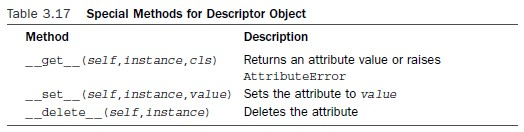

In [5]:
class TypeChecker(object):
    def __init__(self, name, type, default = None):
        self.name = name
        self.type = type
        self.default = default
        
    def __get__(self, instance, cls):
        return self.name
        
    def __set__(self, instance, value):
        if not isinstance(value, self.type):
            raise TypeError("argument must of type %s" %self.type)
        self.name = value
        
    def __delete__(self, instance):
        raise AttributeError("can't delete attribute")

In [6]:
class B(object):
    name = TypeChecker("name", str)
    num = TypeChecker("num", int, 33)

In [7]:
f = B()
a = f.name
print(a)
f.name = "Guido"
print(f.name)
del f.name

name
Guido


AttributeError: can't delete attribute

<b>Creating a Descriptor using property() :</b>
property(), it is easy to create a usable descriptor for any attribute. Syntax for creating property()

property(fget=None, fset=None, fdel=None, doc=None)

In [1]:
# Python program to explain property() function
	
# Alphabet class
class Alphabet:
	def __init__(self, value):
		self._value = value
			
	# getting the values
	def getValue(self):
		print('Getting value')
		return self._value
			
	# setting the values
	def setValue(self, value):
		print('Setting value to ' + value)
		self._value = value
			
	# deleting the values
	def delValue(self):
		print('Deleting value')
		del self._value
		
	value = property(getValue, setValue, delValue, )
	
# passing the value
x = Alphabet('GeeksforGeeks')
print(x.value)
	
x.value = 'GfG'
	
del x.value


Getting value
GeeksforGeeks
Setting value to GfG
Deleting value


A suble aspect of attribute manipulation is that sometimes the attributes of an object are wrapped with an extra layer of logic that interact with the get(), set(), and delete() operations as described above.  This kind of wrapping is accomplished by creating a descriptor object that implements one or more of the methods listed in Table 3.17.  Keep in mind that descriptors are optional and rarely need to be defined.

## Data Encapsulation and Private Attributes

Data encapsulation implies that client code does not have direct access to an object's data.  By default, all attributes and methods of a class in Python are public.  This means that they are directly accessible from client code without any restrictions. To resolve this problem, all names in a class that start with a double underscore are automatically changed to form a new name of the form <b>_Classname__name</b>.

A class can make the names of its attributes less visible by overriding the __dir__() method (returns the list of names returned by the dir() method and used to inspect the attributes of an object).

In [8]:
class A(object):
    def __init__(self):
        self.__X = 3    #mangled to self._A__X
        
    def __dir__(self):
        return ["keep a secret"]
        
c = A()
print(dir(c))
print(c.__X) #variable has been mangled to _A__X

['keep a secret']


AttributeError: 'A' object has no attribute '__X'